In [2]:
#importing libraries
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp

#importing dataset
dataset=pd.read_csv('salary.csv')

#extracting independent and dependent variables
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


## Filling the random forest algorithm to the training set


In [3]:
#filling desicion tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

## predicting the test set result

In [4]:
#predicting the test set result
y_pred=classifier.predict(x_test)

## creating the confusion matrix

In [5]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

## visualizing the training set result

C:\Users\R.MUNIRANJANI\AppData\Local\Temp\ipykernel_12128\192588387.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','green'))(i),label=j)


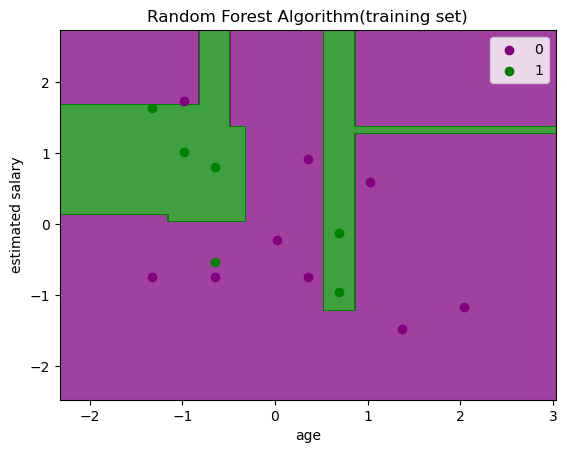

In [6]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  nm.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                      alpha=0.75,cmap=ListedColormap(('purple','green')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','green'))(i),label=j)
mtp.title('Random Forest Algorithm(training set)')
mtp.xlabel('age')
mtp.ylabel('estimated salary')
mtp.legend()
mtp.show()

C:\Users\R.MUNIRANJANI\AppData\Local\Temp\ipykernel_12128\3415988175.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','green'))(i),label=j)


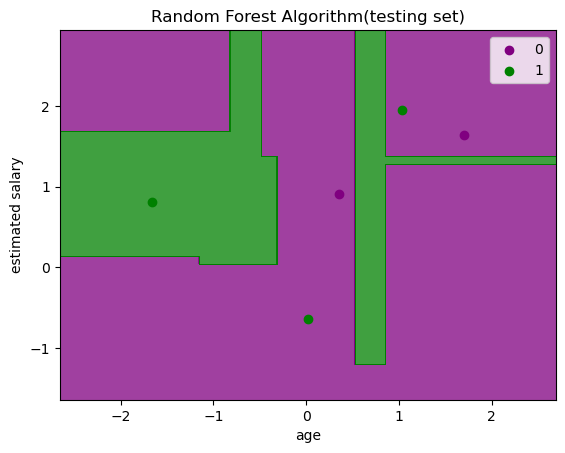

In [7]:

from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  nm.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                      alpha=0.75,cmap=ListedColormap(('purple','green')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('purple','green'))(i),label=j)
mtp.title('Random Forest Algorithm(testing set)')
mtp.xlabel('age')
mtp.ylabel('estimated salary')
mtp.legend()
mtp.show()